In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from statsmodels.regression.mixed_linear_model import MixedLM
import geopandas as gpd
from shapely.geometry import Polygon
from mpl_toolkits.mplot3d import Axes3D

In [12]:
census_block_data = pd.read_csv('Downloads/HeatWatchGISMasterTable.csv')
census_block_data.head()

,BlockGroup_ID,CNTY_NAME,ACSTOTPOP,Total m2,PEOPCOLORPCT,LOWINCPCT,UNEMPPCT,LINGISOPCT,LESSHSPCT,LIFEEXPPCT,Pct_Trees,PCT_ImpSurf,MeanTemp_F,zMeanTemp_F,Unnamed: 14
0,5.119101e+11,"Abingdon, Washington County",1478.0,766532.0,0.085250,0.144790,0.094840,0.000000,0.079930,0.172308,0.624886,0.149148,84.934832,1.280520,NaN
1,5.119101e+11,"Abingdon, Washington County",1270.0,114980.0,0.034646,0.073228,0.000000,0.000000,0.053302,0.172308,0.518673,0.193495,83.756409,-1.347836,NaN
2,5.119101e+11,"Abingdon, Washington County",3040.0,2245563.0,0.033882,0.281104,0.104282,0.002770,0.133694,0.213333,0.221825,0.268250,84.666568,0.682183,NaN
3,5.119101e+11,"Abingdon, Washington County",1291.0,2061261.0,0.034082,0.179706,0.096154,0.015411,0.046296,0.225641,0.230271,0.271444,84.729499,0.822544,NaN
4,5.119101e+11,"Abingdon, Washington County",1641.0,1730033.0,0.084095,0.261568,0.028916,0.000000,0.082333,0.225641,0.369874,0.283785,83.502372,-1.914442,NaN


In [14]:
county_data = pd.read_csv('Downloads/HRI_Data (3).csv')
county_data.head()

,CNTY_NAME,2017 calc,2018 calc,2019 calc,2020 calc,2021 calc,avg_calc
0,Arlington County,0.852344,0.847368,1.520001,0.795598,0.813928,0.965848
1,Petersburg City,1.893520,2.842532,3.543064,2.408906,2.480246,2.633654
2,Winchester City,2.268088,11.801731,16.382933,11.066291,13.171010,10.938010
3,Lynchburg City,0.745129,0.614938,1.947230,0.886312,4.044796,1.647681
4,"Farmville, Prince Edward County",0.000000,3.055968,0.877116,0.912992,6.374647,2.244145


In [16]:
print(county_data.columns.tolist())

['CNTY_NAME', '2017 calc', '2018 calc', '2019 calc', '2020 calc', '2021 calc', 'avg_calc']


In [32]:
# Now merge using a single column name
merged_data = census_block_data.merge(county_data, on="CNTY_NAME", how="inner")

In [34]:
merged_data.head()

,BlockGroup_ID,CNTY_NAME,ACSTOTPOP,Total m2,PEOPCOLORPCT,LOWINCPCT,UNEMPPCT,LINGISOPCT,LESSHSPCT,LIFEEXPPCT,...,PCT_ImpSurf,MeanTemp_F,zMeanTemp_F,Unnamed: 14,2017 calc,2018 calc,2019 calc,2020 calc,2021 calc,avg_calc
0,5.119101e+11,"Abingdon, Washington County",1478.0,766532.0,0.085250,0.144790,0.094840,0.000000,0.079930,0.172308,...,0.149148,84.934832,1.280520,NaN,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
1,5.119101e+11,"Abingdon, Washington County",1270.0,114980.0,0.034646,0.073228,0.000000,0.000000,0.053302,0.172308,...,0.193495,83.756409,-1.347836,NaN,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
2,5.119101e+11,"Abingdon, Washington County",3040.0,2245563.0,0.033882,0.281104,0.104282,0.002770,0.133694,0.213333,...,0.268250,84.666568,0.682183,NaN,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
3,5.119101e+11,"Abingdon, Washington County",1291.0,2061261.0,0.034082,0.179706,0.096154,0.015411,0.046296,0.225641,...,0.271444,84.729499,0.822544,NaN,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
4,5.119101e+11,"Abingdon, Washington County",1641.0,1730033.0,0.084095,0.261568,0.028916,0.000000,0.082333,0.225641,...,0.283785,83.502372,-1.914442,NaN,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835


In [36]:
merged_data = merged_data.drop(columns=["Unnamed: 14"])

In [38]:
merged_data.head()

,BlockGroup_ID,CNTY_NAME,ACSTOTPOP,Total m2,PEOPCOLORPCT,LOWINCPCT,UNEMPPCT,LINGISOPCT,LESSHSPCT,LIFEEXPPCT,Pct_Trees,PCT_ImpSurf,MeanTemp_F,zMeanTemp_F,2017 calc,2018 calc,2019 calc,2020 calc,2021 calc,avg_calc
0,5.119101e+11,"Abingdon, Washington County",1478.0,766532.0,0.085250,0.144790,0.094840,0.000000,0.079930,0.172308,0.624886,0.149148,84.934832,1.280520,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
1,5.119101e+11,"Abingdon, Washington County",1270.0,114980.0,0.034646,0.073228,0.000000,0.000000,0.053302,0.172308,0.518673,0.193495,83.756409,-1.347836,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
2,5.119101e+11,"Abingdon, Washington County",3040.0,2245563.0,0.033882,0.281104,0.104282,0.002770,0.133694,0.213333,0.221825,0.268250,84.666568,0.682183,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
3,5.119101e+11,"Abingdon, Washington County",1291.0,2061261.0,0.034082,0.179706,0.096154,0.015411,0.046296,0.225641,0.230271,0.271444,84.729499,0.822544,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835
4,5.119101e+11,"Abingdon, Washington County",1641.0,1730033.0,0.084095,0.261568,0.028916,0.000000,0.082333,0.225641,0.369874,0.283785,83.502372,-1.914442,0.985097,1.198681,5.369288,1.156136,2.929974,2.327835


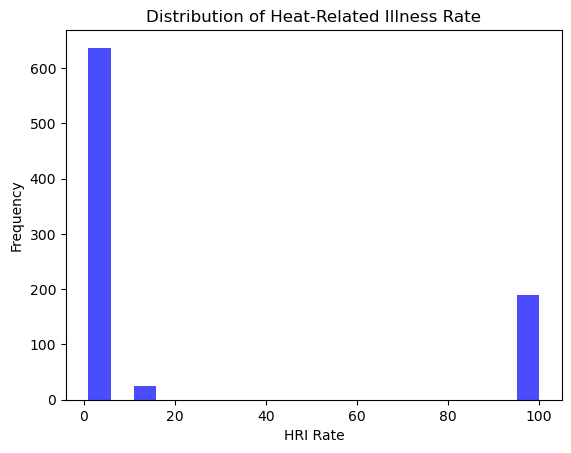

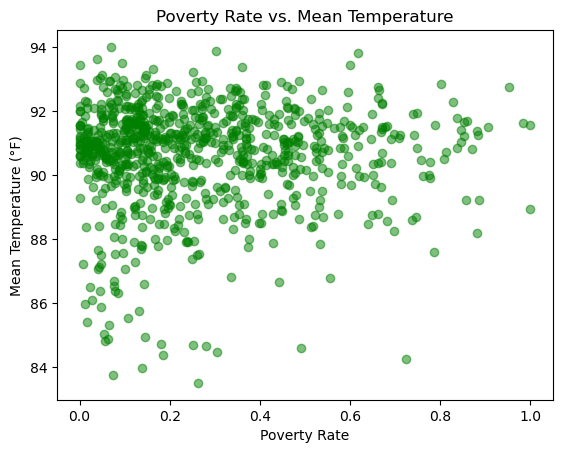

In [42]:
# Histogram of HRI Rate
plt.hist(merged_data["avg_calc"], bins=20, alpha=0.7, color="blue")
plt.xlabel("HRI Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Heat-Related Illness Rate")
plt.show()

# Scatterplot: Poverty Rate vs. Mean Temperature
plt.scatter(merged_data["LOWINCPCT"], merged_data["MeanTemp_F"], alpha=0.5, color="green")
plt.xlabel("Poverty Rate")
plt.ylabel("Mean Temperature (°F)")
plt.title("Poverty Rate vs. Mean Temperature")
plt.show()

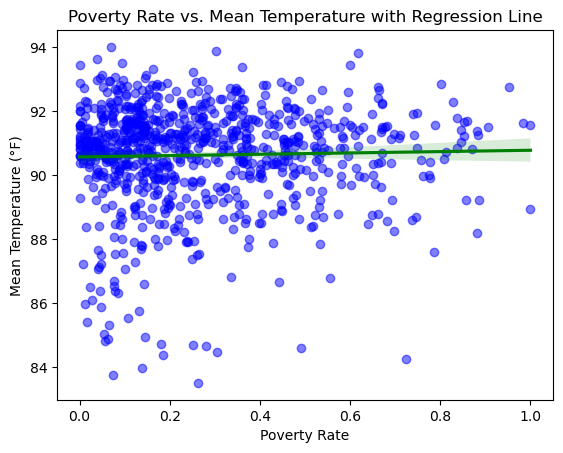

In [50]:
import numpy as np
import seaborn as sns

#regression line
sns.regplot(x="LOWINCPCT", y="MeanTemp_F", data=merged_data, color = 'blue', scatter_kws={"alpha": 0.5}, line_kws={"color": "green"})
plt.xlabel("Poverty Rate")
plt.ylabel("Mean Temperature (°F)")
plt.title("Poverty Rate vs. Mean Temperature with Regression Line")
plt.show()

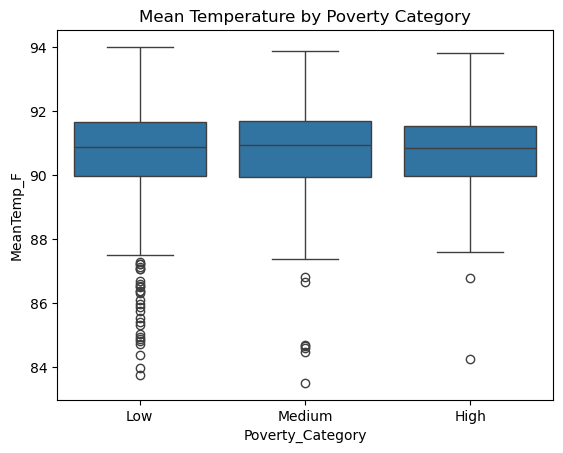

In [90]:
merged_data["Poverty_Category"] = pd.cut(merged_data["LOWINCPCT"], bins=[0, 0.2, 0.5, 1.0], labels=["Low", "Medium", "High"])
sns.boxplot(x="Poverty_Category", y="MeanTemp_F", data=merged_data)
plt.title("Mean Temperature by Poverty Category")
plt.show()

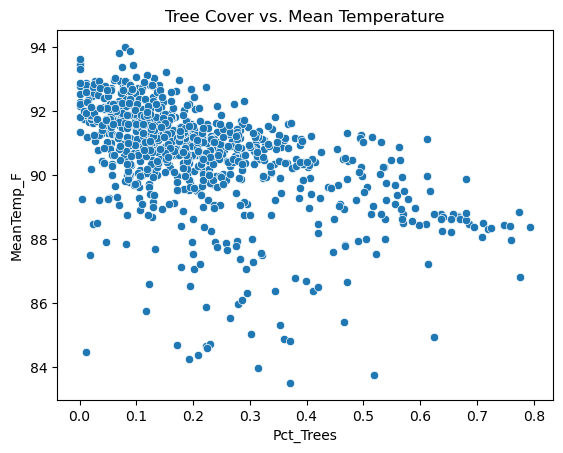

In [78]:
sns.scatterplot(x="Pct_Trees", y="MeanTemp_F", data=merged_data)
plt.title("Tree Cover vs. Mean Temperature")
plt.show()

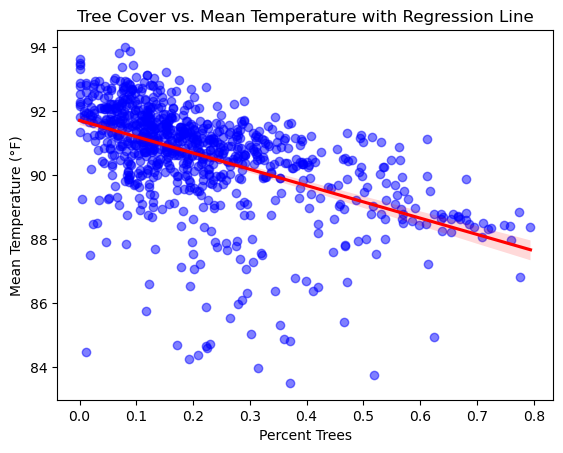

In [52]:
sns.regplot(x="Pct_Trees", y="MeanTemp_F", data=merged_data, color = 'blue', scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Percent Trees")
plt.ylabel("Mean Temperature (°F)")
plt.title("Tree Cover vs. Mean Temperature with Regression Line")
plt.show()

In [82]:
correlation = merged_data["Pct_Trees"].corr(merged_data["MeanTemp_F"])
print("Correlation between Tree Cover and Mean Temperature:", correlation)

Correlation between Tree Cover and Mean Temperature: -0.503184264124743


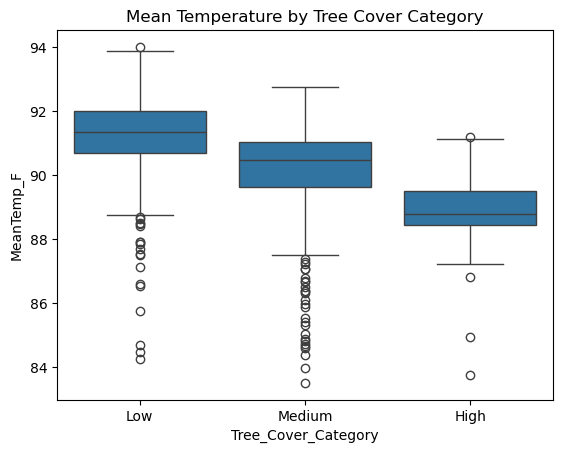

In [84]:
merged_data["Tree_Cover_Category"] = pd.cut(merged_data["Pct_Trees"], bins=[0, 0.2, 0.5, 1.0], labels=["Low", "Medium", "High"])
sns.boxplot(x="Tree_Cover_Category", y="MeanTemp_F", data=merged_data)
plt.title("Mean Temperature by Tree Cover Category")
plt.show()

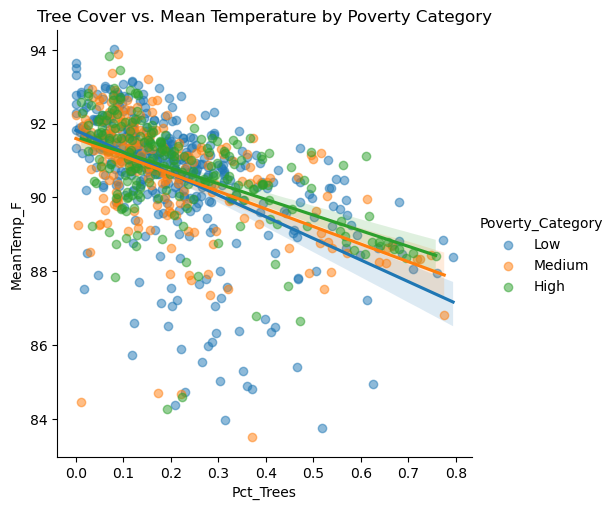

In [537]:
merged_data['Poverty_Category'] = pd.cut(
    merged_data['LOWINCPCT'],
    bins=[0.0, 0.20, 0.40, 1.00],  # Thresholds based on quartiles
    labels=['Low', 'Medium', 'High']  # Descriptive labels
)
sns.lmplot(x="Pct_Trees", y="MeanTemp_F", hue="Poverty_Category", data=merged_data, scatter_kws={"alpha": 0.5})
plt.title("Tree Cover vs. Mean Temperature by Poverty Category")
plt.show()

In [533]:
print(merged_data['LOWINCPCT'].describe())

count    852.000000
mean       0.266780
std        0.214450
min        0.000000
25%        0.101353
50%        0.203780
75%        0.398637
max        1.000000
Name: LOWINCPCT, dtype: float64


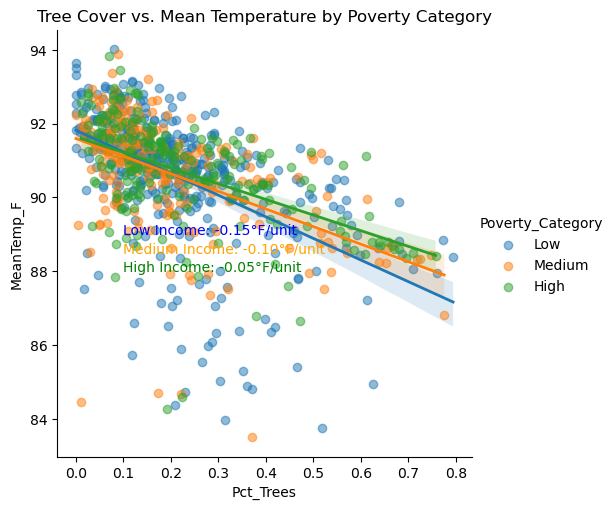

In [539]:
sns.lmplot(
    x="Pct_Trees",
    y="MeanTemp_F",
    hue="Poverty_Category",
    data=merged_data,
    scatter_kws={"alpha": 0.5},
    line_kws={"lw": 2}
)
plt.title("Tree Cover vs. Mean Temperature by Poverty Category")
plt.text(0.1, 89, "Low Income: -0.15°F/unit", color="blue")
plt.text(0.1, 88.5, "Medium Income: -0.10°F/unit", color="orange")
plt.text(0.1, 88, "High Income: -0.05°F/unit", color="green")
plt.show()

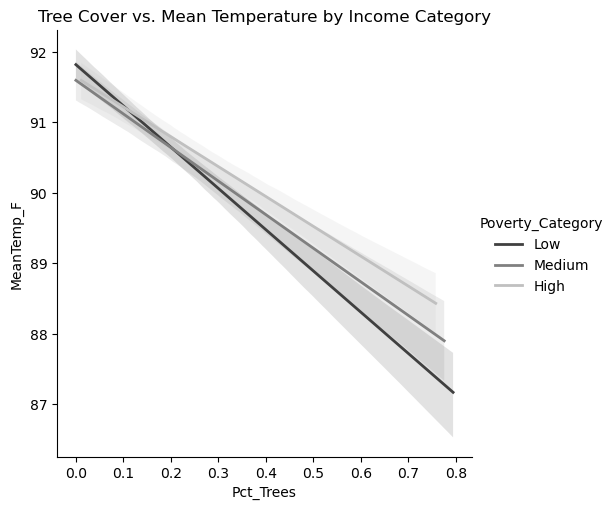

In [551]:
sns.lmplot(
    x="Pct_Trees", y="MeanTemp_F", hue="Poverty_Category", data=merged_data, scatter=False, palette = 'gray', line_kws={"lw": 2})
plt.title("Tree Cover vs. Mean Temperature by Income Category")
plt.show()

In [523]:
print(merged_data['Pct_Trees'].describe())

count    852.000000
mean       0.213061
std        0.159636
min        0.000000
25%        0.099822
50%        0.171921
75%        0.282418
max        0.794188
Name: Pct_Trees, dtype: float64


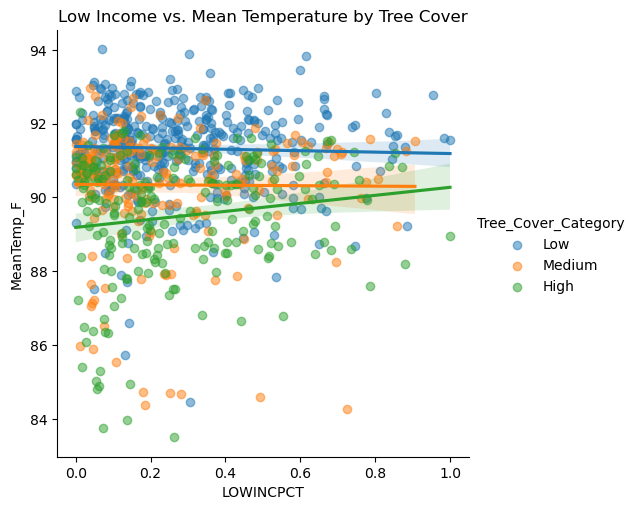

In [529]:
merged_data['Tree_Cover_Category'] = pd.cut(
    merged_data['Pct_Trees'], bins = [0, 0.17, 0.28, 0.8],
    labels=['Low', 'Medium', 'High']
)
sns.lmplot(x="LOWINCPCT", y="MeanTemp_F", hue="Tree_Cover_Category", data=merged_data, scatter_kws={"alpha": 0.5})
plt.title("Low Income vs. Mean Temperature by Tree Cover")
plt.show()

In [506]:
#correlation matrix
correlation_matrix = merged_data[["LOWINCPCT", "Pct_Trees", "MeanTemp_F"]].corr()
print(correlation_matrix)

            LOWINCPCT  Pct_Trees  MeanTemp_F
LOWINCPCT    1.000000   0.011145    0.027676
Pct_Trees    0.011145   1.000000   -0.503184
MeanTemp_F   0.027676  -0.503184    1.000000


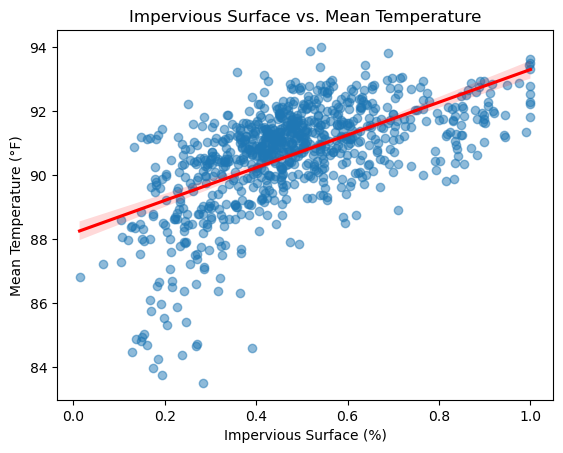

In [54]:
sns.regplot(x="PCT_ImpSurf", y="MeanTemp_F", data=merged_data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Impervious Surface (%)")
plt.ylabel("Mean Temperature (°F)")
plt.title("Impervious Surface vs. Mean Temperature")
plt.show()

In [106]:
print(merged_data.columns)

Index(['BlockGroup_ID', 'CNTY_NAME', 'ACSTOTPOP', 'Total m2', 'PEOPCOLORPCT',
       'LOWINCPCT', 'UNEMPPCT', 'LINGISOPCT', 'LESSHSPCT', 'LIFEEXPPCT',
       'Pct_Trees', 'PCT_ImpSurf', 'MeanTemp_F', 'zMeanTemp_F', '2017 calc',
       '2018 calc', '2019 calc', '2020 calc', '2021 calc', 'HRI_Rate',
       'Tree_Cover_Category', 'Poverty_Category', 'High_Heat'],
      dtype='object')


In [114]:
correlation_matrix = merged_data[["PCT_ImpSurf", "MeanTemp_F", "Pct_Trees", "LOWINCPCT"]].corr()
print(correlation_matrix)

             PCT_ImpSurf  MeanTemp_F  Pct_Trees  LOWINCPCT
PCT_ImpSurf     1.000000    0.590070  -0.737771   0.031145
MeanTemp_F      0.590070    1.000000  -0.503184   0.027676
Pct_Trees      -0.737771   -0.503184   1.000000   0.011145
LOWINCPCT       0.031145    0.027676   0.011145   1.000000


In [126]:
from statsmodels.regression.mixed_linear_model import MixedLM

fixed_effects = "Pct_Trees + PCT_ImpSurf + LOWINCPCT"

model = MixedLM.from_formula(f"MeanTemp_F ~ {fixed_effects}", groups="CNTY_NAME", data=merged_data)
result = model.fit()

print(result.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: MeanTemp_F
No. Observations:  852     Method:             REML      
No. Groups:        10      Scale:              0.9724    
Min. group size:   7       Log-Likelihood:     -1221.8726
Max. group size:   273     Converged:          Yes       
Mean group size:   85.2                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     89.258    0.679 131.367 0.000 87.926 90.589
Pct_Trees     -2.548    0.431  -5.908 0.000 -3.394 -1.703
PCT_ImpSurf    2.372    0.333   7.126 0.000  1.720  3.025
LOWINCPCT      0.432    0.189   2.278 0.023  0.060  0.803
CNTY_NAME Var  4.004    1.959                            



In [130]:
#Mixed LM model 
model = MixedLM.from_formula(f"HRI_Rate ~ PCT_ImpSurf + Pct_Trees + LOWINCPCT", groups="CNTY_NAME", data=merged_data)
result = model.fit()

print(result.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: HRI_Rate 
No. Observations:   852     Method:             REML     
No. Groups:         10      Scale:              0.0000   
Min. group size:    7       Log-Likelihood:     7614.1632
Max. group size:    273     Converged:          Yes      
Mean group size:    85.2                                 
---------------------------------------------------------
              Coef.   Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     12.962     1.002 12.940 0.000 10.998 14.925
PCT_ImpSurf    0.000     0.000  0.000 1.000 -0.000  0.000
Pct_Trees     -0.000     0.000 -0.000 1.000 -0.000  0.000
LOWINCPCT      0.000     0.000  0.000 1.000 -0.000  0.000
CNTY_NAME Var 10.022 18787.944                           



In [136]:
from statsmodels.regression.mixed_linear_model import MixedLM

formula = "MeanTemp_F ~ PCT_ImpSurf * Pct_Trees * LOWINCPCT"

#fit model
model = MixedLM.from_formula(formula, groups="CNTY_NAME", data=merged_data)
result = model.fit()

print(result.summary())

                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        MeanTemp_F
No. Observations:        852            Method:                    REML      
No. Groups:              10             Scale:                     0.9281    
Min. group size:         7              Log-Likelihood:            -1194.0249
Max. group size:         273            Converged:                 Yes       
Mean group size:         85.2                                                
-----------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                        88.152    0.712 123.829 0.000  86.757 89.547
PCT_ImpSurf                       3.638    0.472   7.709 0.000   2.713  4.563
Pct_Trees                        -3.653    0.734  -4.978 0.000  -5.092 -2.215
PCT_Im

In [204]:
correlation_matrix = merged_data[["PCT_ImpSurf", "Pct_Trees", "LOWINCPCT", "MeanTemp_F"]].corr()
print(correlation_matrix)

             PCT_ImpSurf  Pct_Trees  LOWINCPCT  MeanTemp_F
PCT_ImpSurf     1.000000  -0.737771   0.031145    0.590070
Pct_Trees      -0.737771   1.000000   0.011145   -0.503184
LOWINCPCT       0.031145   0.011145   1.000000    0.027676
MeanTemp_F      0.590070  -0.503184   0.027676    1.000000


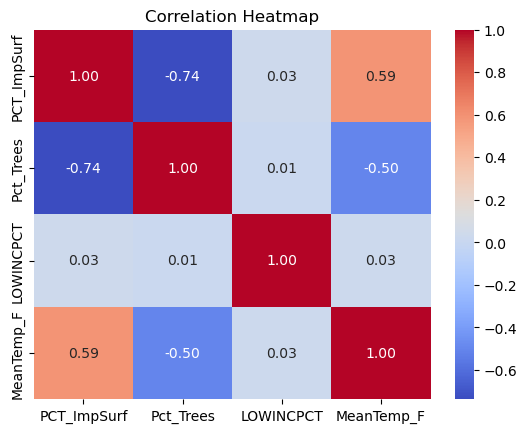

In [206]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

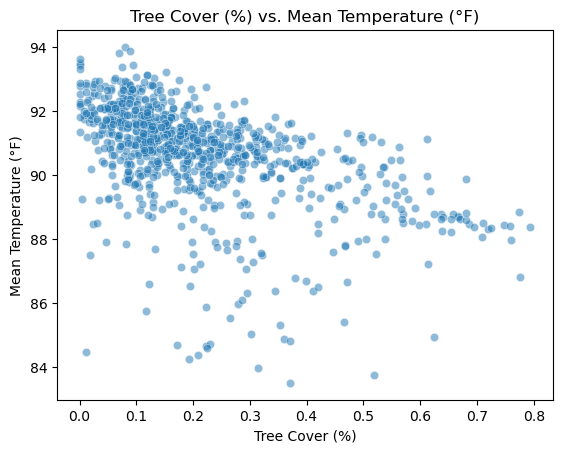

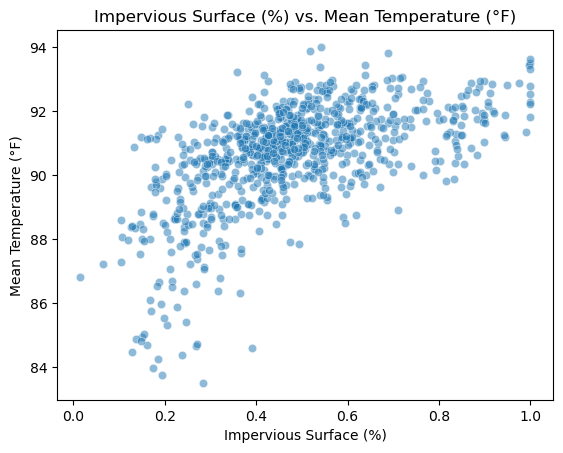

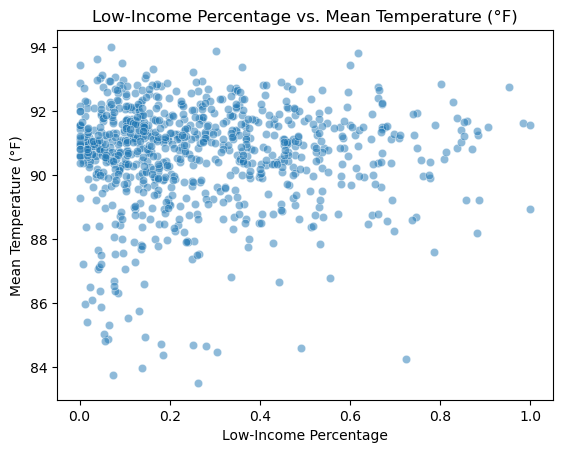

In [208]:
sns.scatterplot(x="Pct_Trees", y="MeanTemp_F", data=merged_data, alpha=0.5)
plt.title("Tree Cover (%) vs. Mean Temperature (°F)")
plt.xlabel("Tree Cover (%)")
plt.ylabel("Mean Temperature (°F)")
plt.show()

sns.scatterplot(x="PCT_ImpSurf", y="MeanTemp_F", data=merged_data, alpha=0.5)
plt.title("Impervious Surface (%) vs. Mean Temperature (°F)")
plt.xlabel("Impervious Surface (%)")
plt.ylabel("Mean Temperature (°F)")
plt.show()

sns.scatterplot(x="LOWINCPCT", y="MeanTemp_F", data=merged_data, alpha=0.5)
plt.title("Low-Income Percentage vs. Mean Temperature (°F)")
plt.xlabel("Low-Income Percentage")
plt.ylabel("Mean Temperature (°F)")
plt.show()

In [216]:
county_to_hri = county_data.set_index("CNTY_NAME")["HRI_Rate"].to_dict()
merged_data["HRI_Rate"] = merged_data["CNTY_NAME"].map(county_to_hri)

In [218]:
from statsmodels.regression.mixed_linear_model import MixedLM

#big formula
formula = "MeanTemp_F ~ PCT_ImpSurf * Pct_Trees * LOWINCPCT * HRI_Rate"

# Fit the mixed model, grouping by county
model = MixedLM.from_formula(formula, groups="CNTY_NAME", data=merged_data)
result = model.fit()

# Print the model summary
print(result.summary())

                         Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           MeanTemp_F
No. Observations:            852               Method:                       REML      
No. Groups:                  10                Scale:                        0.8892    
Min. group size:             7                 Log-Likelihood:               -1195.8773
Max. group size:             273               Converged:                    Yes       
Mean group size:             85.2                                                      
---------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                                 87.745    0.797 110.147 0.000  86.184  89.307
PCT_ImpSurf                                4.264    0.538

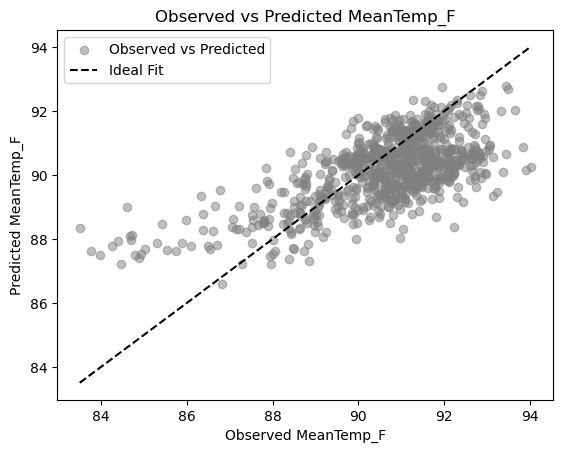

In [483]:
merged_data["Predicted_MeanTemp_F"] = result.predict()

plt.scatter(merged_data["MeanTemp_F"], merged_data["Predicted_MeanTemp_F"], alpha=0.5, label="Observed vs Predicted", color = 'gray')
plt.plot(
    [merged_data["MeanTemp_F"].min(), merged_data["MeanTemp_F"].max()],
    [merged_data["MeanTemp_F"].min(), merged_data["MeanTemp_F"].max()],
    color="black", linestyle="--", label="Ideal Fit"
)
plt.xlabel("Observed MeanTemp_F")
plt.ylabel("Predicted MeanTemp_F")
plt.title("Observed vs Predicted MeanTemp_F")
plt.legend()
plt.show()

In [577]:
print(merged_data['PCT_ImpSurf'].describe())

count    852.000000
mean       0.476707
std        0.186237
min        0.013560
25%        0.356601
50%        0.457608
75%        0.578673
max        1.000000
Name: PCT_ImpSurf, dtype: float64


In [625]:
print(merged_data['LOWINCPCT'].describe())

count    852.000000
mean       0.266780
std        0.214450
min        0.000000
25%        0.101353
50%        0.203780
75%        0.398637
max        1.000000
Name: LOWINCPCT, dtype: float64


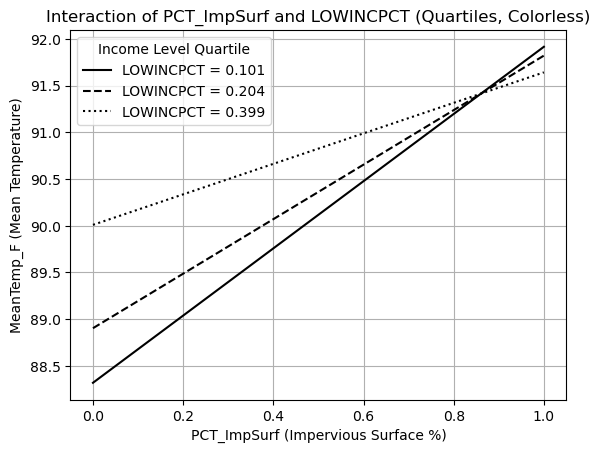

In [635]:
params = {
    "Intercept": 87.745,
    "PCT_ImpSurf": 4.264,
    "LOWINCPCT": 5.675,
    "PCT_ImpSurf:LOWINCPCT": -6.594
}

x = np.linspace(0, 1, 100)

low_income_levels = [0.101, 0.204, 0.399] 

line_styles = ['solid', 'dashed', 'dotted']

for low_income, style in zip(low_income_levels, line_styles):
    y = (
        params["Intercept"] +
        params["PCT_ImpSurf"] * x +
        params["LOWINCPCT"] * low_income +
        params["PCT_ImpSurf:LOWINCPCT"] * x * low_income
    )
    plt.plot(x, y, linestyle=style, color = 'black', label=f"LOWINCPCT = {low_income:.3f}")

plt.xlabel("PCT_ImpSurf (Impervious Surface %)")
plt.ylabel("MeanTemp_F (Mean Temperature)")
plt.title("Interaction of PCT_ImpSurf and LOWINCPCT (Quartiles, Colorless)")
plt.legend(title="Income Level Quartile")
plt.grid(True)
plt.show()

In [601]:
print(type(merged_data)) 

<class 'pandas.core.frame.DataFrame'>


In [603]:
print(merged_data.columns)

Index(['BlockGroup_ID', 'CNTY_NAME', 'ACSTOTPOP', 'Total m2', 'PEOPCOLORPCT',
       'LOWINCPCT', 'UNEMPPCT', 'LINGISOPCT', 'LESSHSPCT', 'LIFEEXPPCT',
       'Pct_Trees', 'PCT_ImpSurf', 'MeanTemp_F', 'zMeanTemp_F', '2017 calc',
       '2018 calc', '2019 calc', '2020 calc', '2021 calc', 'avg_calc',
       'Predicted_MeanTemp_F', 'Tree_Cover_Category', 'Income_Category',
       'Poverty_Category'],
      dtype='object')


In [587]:
simpler_model = MixedLM.from_formula("MeanTemp_F ~ PCT_ImpSurf + Pct_Trees", groups="CNTY_NAME", data=merged_data)
simpler_result = simpler_model.fit()
print(simpler_result.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: MeanTemp_F
No. Observations:  852     Method:             REML      
No. Groups:        10      Scale:              0.9773    
Min. group size:   7       Log-Likelihood:     -1223.7180
Max. group size:   273     Converged:          Yes       
Mean group size:   85.2                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     89.375    0.676 132.190 0.000 88.050 90.700
PCT_ImpSurf    2.449    0.332   7.375 0.000  1.798  3.100
Pct_Trees     -2.567    0.432  -5.939 0.000 -3.415 -1.720
CNTY_NAME Var  3.982    1.944                            



In [228]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(merged_data, test_size=0.2, random_state=42)
model = MixedLM.from_formula("MeanTemp_F ~ PCT_ImpSurf * Pct_Trees * LOWINCPCT", groups="CNTY_NAME", data=train_data)
result = model.fit()
print(result.summary())

                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        MeanTemp_F
No. Observations:         681            Method:                    REML      
No. Groups:               10             Scale:                     0.9806    
Min. group size:          6              Log-Likelihood:            -973.3851 
Max. group size:          223            Converged:                 Yes       
Mean group size:          68.1                                                
------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------------
Intercept                        88.060    0.713 123.438 0.000  86.661  89.458
PCT_ImpSurf                       3.643    0.557   6.545 0.000   2.552   4.733
Pct_Trees                        -4.192    0.868  -4.832 0.000  -5.893  -

In [244]:
print(merged_data[['PCT_ImpSurf', 'Pct_Trees', 'LOWINCPCT']].isnull().sum())

print(merged_data[['PCT_ImpSurf', 'Pct_Trees', 'LOWINCPCT']].describe())

PCT_ImpSurf    0
Pct_Trees      0
LOWINCPCT      0
dtype: int64
       PCT_ImpSurf   Pct_Trees   LOWINCPCT
count   852.000000  852.000000  852.000000
mean      0.476707    0.213061    0.266780
std       0.186237    0.159636    0.214450
min       0.013560    0.000000    0.000000
25%       0.356601    0.099822    0.101353
50%       0.457608    0.171921    0.203780
75%       0.578673    0.282418    0.398637
max       1.000000    0.794188    1.000000


In [246]:
correlation_matrix = merged_data[['PCT_ImpSurf', 'Pct_Trees', 'LOWINCPCT']].corr()
print(correlation_matrix)

             PCT_ImpSurf  Pct_Trees  LOWINCPCT
PCT_ImpSurf     1.000000  -0.737771   0.031145
Pct_Trees      -0.737771   1.000000   0.011145
LOWINCPCT       0.031145   0.011145   1.000000


In [377]:
from statsmodels.regression.mixed_linear_model import MixedLM

#simpler model
simpler_model = MixedLM.from_formula(
    "MeanTemp_F ~ PCT_ImpSurf + Pct_Trees",
    groups="CNTY_NAME",
    data=merged_data
)

simpler_result = simpler_model.fit()
print(simpler_result.summary())

#full model 
full_model = MixedLM.from_formula(
    "MeanTemp_F ~ PCT_ImpSurf * Pct_Trees * LOWINCPCT",
    groups="CNTY_NAME",
    data=merged_data
)

full_model_result = full_model.fit()
print(full_model_result.summary())

print(f"Full Model AIC: {full_model_result.aic}, Simpler Model AIC: {simpler_model_result.aic}")

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: MeanTemp_F
No. Observations:  852     Method:             REML      
No. Groups:        10      Scale:              0.9773    
Min. group size:   7       Log-Likelihood:     -1223.7180
Max. group size:   273     Converged:          Yes       
Mean group size:   85.2                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     89.375    0.676 132.190 0.000 88.050 90.700
PCT_ImpSurf    2.449    0.332   7.375 0.000  1.798  3.100
Pct_Trees     -2.567    0.432  -5.939 0.000 -3.415 -1.720
CNTY_NAME Var  3.982    1.944                            

                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        MeanTemp_F
No. Observations:        852            Method:              

In [260]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = merged_data[['PCT_ImpSurf', 'Pct_Trees', 'LOWINCPCT', 'HRI_Rate']]  # Add relevant columns
X = X.dropna()  
X = sm.add_constant(X)  #add intercept
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      Variable        VIF
0        const  31.253935
1  PCT_ImpSurf   2.214586
2    Pct_Trees   2.202011
3    LOWINCPCT   1.110536
4     HRI_Rate   1.116893


In [266]:
selected_columns = ["MeanTemp_F", "UNEMPPCT", "LESSHSPCT", "PEOPCOLORPCT", "PCT_ImpSurf"]
analysis_data = merged_data[selected_columns].dropna()
print(analysis_data.isnull().sum())

MeanTemp_F      0
UNEMPPCT        0
LESSHSPCT       0
PEOPCOLORPCT    0
PCT_ImpSurf     0
dtype: int64


In [282]:
formula = "MeanTemp_F ~ PCT_ImpSurf + UNEMPPCT + LESSHSPCT + PEOPCOLORPCT"
model = MixedLM.from_formula(formula, groups="CNTY_NAME", data=analysis_data)
result = model.fit()
print(result.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: MeanTemp_F
No. Observations:  852     Method:             REML      
No. Groups:        10      Scale:              0.9264    
Min. group size:   7       Log-Likelihood:     -1199.9532
Max. group size:   273     Converged:          Yes       
Mean group size:   85.2                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     87.676    0.575 152.418 0.000 86.548 88.803
PCT_ImpSurf    3.818    0.203  18.818 0.000  3.421  4.216
UNEMPPCT      -0.596    0.580  -1.028 0.304 -1.732  0.540
LESSHSPCT     -0.384    0.411  -0.934 0.350 -1.191  0.422
PEOPCOLORPCT   1.404    0.166   8.476 0.000  1.080  1.729
CNTY_NAME Var  3.176    1.598                            



In [274]:
print(analysis_data.columns)

Index(['MeanTemp_F', 'UNEMPPCT', 'LESSHSPCT', 'PEOPCOLORPCT', 'PCT_ImpSurf'], dtype='object')


In [288]:
selected_columns = ["MeanTemp_F", "HRI_Rate", "LESSHSPCT", "PEOPCOLORPCT", "PCT_ImpSurf", "CNTY_NAME"]
analysis_data = merged_data[selected_columns].dropna()

In [465]:
formula = "MeanTemp_F ~ PCT_ImpSurf * PEOPCOLORPCT * HRI_Rate"

model = MixedLM.from_formula(formula, groups="CNTY_NAME", data=analysis_data)
result = model.fit()

print(result.summary())

                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        MeanTemp_F
No. Observations:        852            Method:                    REML      
No. Groups:              10             Scale:                     0.8519    
Min. group size:         7              Log-Likelihood:            -1178.2787
Max. group size:         273            Converged:                 Yes       
Mean group size:         85.2                                                
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                         86.162    0.613 140.605 0.000 84.960 87.363
PCT_ImpSurf                        6.653    0.410  16.232 0.000  5.849  7.456
PEOPCOLORPCT                       4.622    0.474   9.744 0.000  3.693  5.552
PCT_Im

In [563]:
low_income = merged_data[merged_data['Poverty_Category'] == 'Low']
medium_income = merged_data[merged_data['Poverty_Category'] == 'Medium']
high_income = merged_data[merged_data['Poverty_Category'] == 'High']

low_income_x = low_income['PCT_ImpSurf']
low_income_y = low_income['avg_calc']
low_income_z = (
    coef_intercept +
    coef_ImpSurf * low_income_x +
    coef_HRI * low_income_y +
    coef_interaction * low_income_x * low_income_y
)

medium_income_x = medium_income['PCT_ImpSurf']
medium_income_y = medium_income['avg_calc']
medium_income_z = (
    coef_intercept +
    coef_ImpSurf * medium_income_x +
    coef_HRI * medium_income_y +
    coef_interaction * medium_income_x * medium_income_y
)

high_income_x = high_income['PCT_ImpSurf']
high_income_y = high_income['avg_calc']
high_income_z = (
    coef_intercept +
    coef_ImpSurf * high_income_x +
    coef_HRI * high_income_y +
    coef_interaction * high_income_x * high_income_y
)

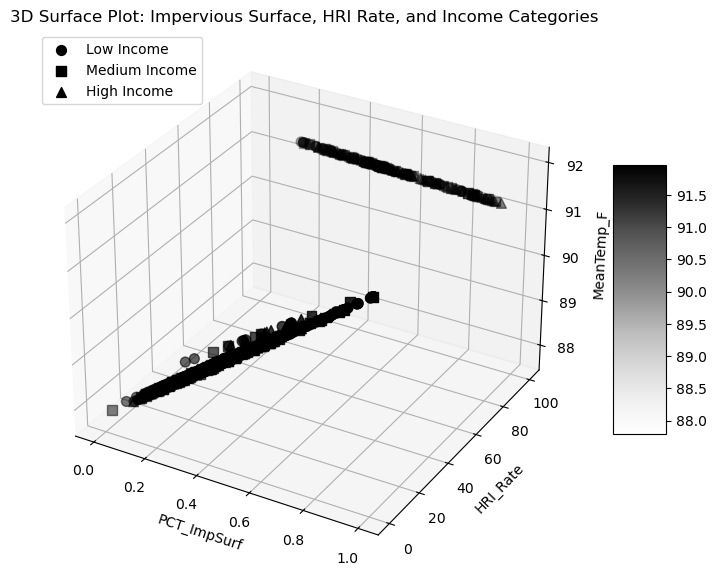

In [573]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(PCT_ImpSurf, HRI_Rate, MeanTemp_F, cmap="Greys", edgecolor='none')

ax.scatter(low_income_x, low_income_y, low_income_z, marker='o', label='Low Income', color = 'black', s=50)
ax.scatter(medium_income_x, medium_income_y, medium_income_z, marker='s', label='Medium Income', color = 'black', s=50)
ax.scatter(high_income_x, high_income_y, high_income_z, marker='^', label='High Income', color = 'black', s=50)

ax.set_xlabel("PCT_ImpSurf")
ax.set_ylabel("HRI_Rate")
ax.set_zlabel("MeanTemp_F")
ax.set_title("3D Surface Plot: Impervious Surface, HRI Rate, and Income Categories")

ax.legend(loc='upper left', fontsize=10)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()